<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/outlier_detection_and_removal_using_the_iqr_method_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/Placement.csv')
#df = pd.read_csv('/kaggle/input/placement/Placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [12]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


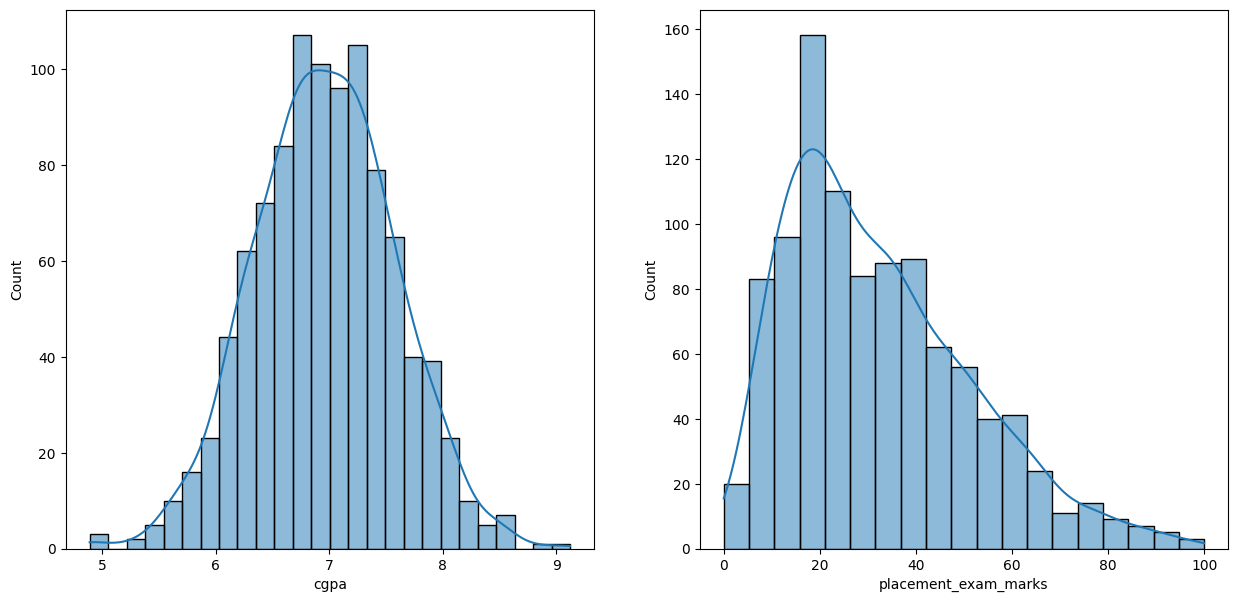

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

<Axes: ylabel='placement_exam_marks'>

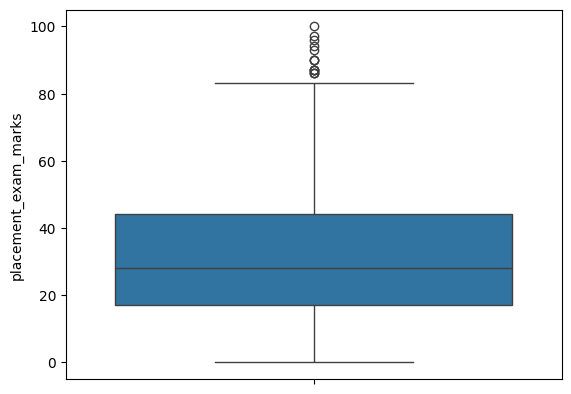

In [14]:
sns.boxplot(df['placement_exam_marks'])

In [15]:
#Find the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [16]:
percentile25, percentile75

(17.0, 44.0)

In [17]:
iqr = percentile75 - percentile25

In [18]:
iqr

27.0

In [19]:
upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)

In [20]:
upper_limit, lower_limit

(84.5, -23.5)

### Finding Outliers

In [21]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


### Trimming

In [22]:
new_df = df[df['placement_exam_marks']<upper_limit]

In [23]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


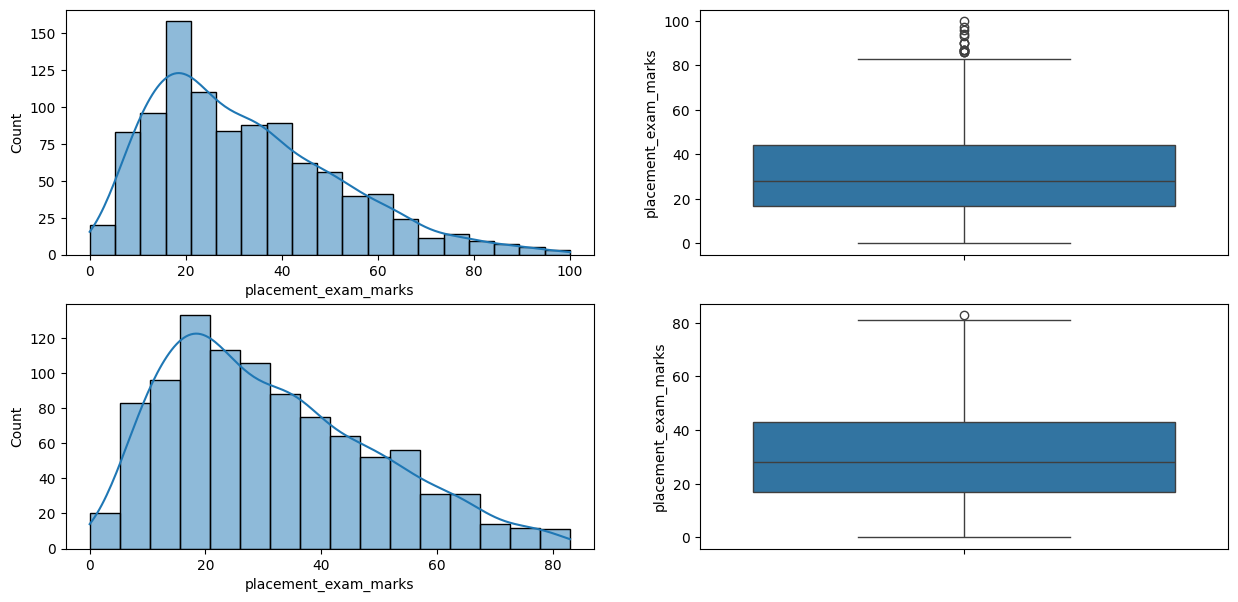

In [24]:
#Compare
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'],orient='horizontal')

plt.subplot(223)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'],orient='horizontal')

plt.show()

### Capping

In [25]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    (df['placement_exam_marks']>upper_limit),
        upper_limit,
    np.where(
    (df['placement_exam_marks']<lower_limit),
        lower_limit,
    df['placement_exam_marks']
    )

)

In [26]:
new_df_cap.shape

(1000, 3)

In [27]:
new_df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


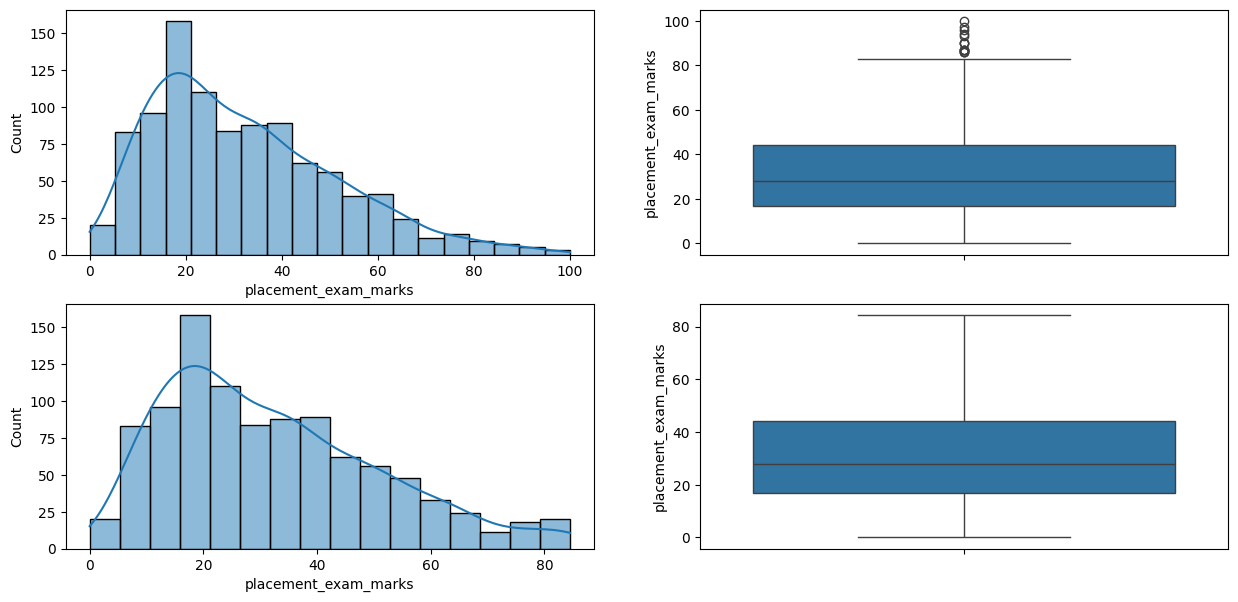

In [28]:
#Compare
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'],orient='horizontal')

plt.subplot(223)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(224)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='horizontal')

plt.show()